In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Load the excel file
dfnew = pd.read_excel('concentrationresultados1.1.xlsx')
dfold = pd.read_excel('concentrationresultados1.2.xlsx')

In [20]:
# Add a new column to each dataframe that will serve as an identifier
dfnew['Condition'] = 'New'

In [21]:
dfold['Condition'] = 'Old'

In [22]:
# Combine the two dataframes
df = pd.concat([dfnew, dfold])

In [23]:
# Reshape the dataframe so that one column contains all biomass values
df_melted = df.melt(id_vars=['time', 'Condition'], value_name='Biomass')

/home/jeremy/anaconda3/envs/dfba/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  


/home/jeremy/anaconda3/envs/dfba/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


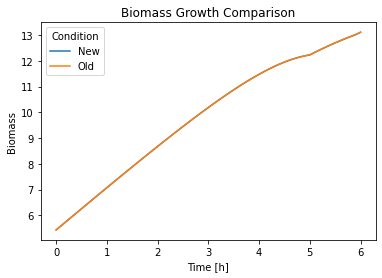

In [24]:
# Create the plot
sns.lineplot(data=df_melted, x='time', y='Biomass', hue='Condition', ci=None, markers=True)

# Customize the plot
plt.title('Biomass Growth Comparison')
plt.xlabel('Time [h]')
plt.ylabel('Biomass')
plt.legend(title='Condition')

# Show the plot
plt.show()

In [58]:
# Load the excel file
fbanew = pd.read_excel('solutions1.1_fba_fluxes.xlsx')
fbaold = pd.read_excel('solutions1.2_fba_fluxes.xlsx')

In [59]:
# Add a new column to each dataframe that will serve as an identifier
fbaold['Condition'] = 'Old'
fbanew['Condition'] = 'New'

In [89]:
# Load the excel file
fbanewtry = pd.read_excel('newtryheatmap.xlsx')
# Set Name as the index of the DataFrame
fbanewtry.set_index('names', inplace=True)

In [90]:
fbanewtry

,newfluxes,oldfluxes
names,,
xAMINOACID,1.056916e-01,1.056916e-01
xBIOMASS,1.056916e-01,1.056916e-01
xLIPID,1.056916e-04,1.056916e-04
xMAINTENANCE,0.000000e+00,0.000000e+00
xPOOL_AC_EM,1.194860e-02,1.194860e-02
...,...,...
y300041,2.276543e-32,0.000000e+00
y300057,-2.378062e-02,-2.378062e-02
y300061,0.000000e+00,-5.186823e-16


<AxesSubplot:ylabel='names'>

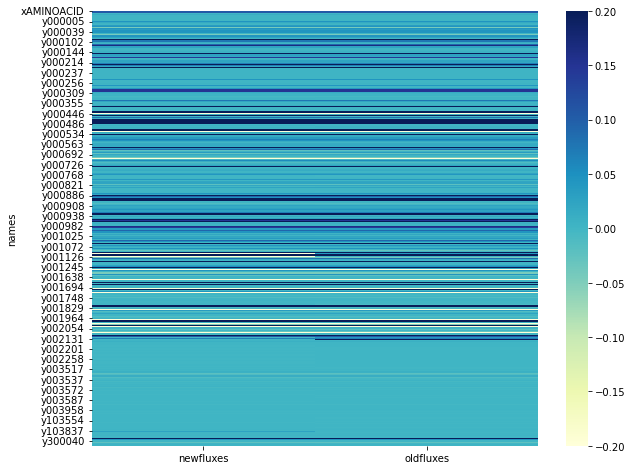

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(fbanewtry, cmap='YlGnBu', vmin=-0.2, vmax=0.2)

In [118]:
df_filtered1 = fbanewtry[abs(abs(fbanewtry['oldfluxes']) - abs(fbanewtry['newfluxes'])) >= 0.01]

In [119]:
df_filtered1

,newfluxes,oldfluxes
names,,
y000446,-0.819445,-0.793582
y000499,0.000000,0.025863
y000851,-0.024203,-0.065212
y001063,0.056651,0.015642
y001112,-2.889187,0.038260
y001126,-2.927448,0.000000
y001824,8.215431,8.189568
y001832,-8.265718,-8.239855
y002117,0.000000,0.041008


In [120]:
df_filtered2 = fbanewtry[abs(abs(fbanewtry['newfluxes']) - abs(fbanewtry['oldfluxes'])) >= 0.01]

In [121]:
df_filtered2

,newfluxes,oldfluxes
names,,
y000446,-0.819445,-0.793582
y000499,0.000000,0.025863
y000851,-0.024203,-0.065212
y001063,0.056651,0.015642
y001112,-2.889187,0.038260
y001126,-2.927448,0.000000
y001824,8.215431,8.189568
y001832,-8.265718,-8.239855
y002117,0.000000,0.041008


In [20]:
# Load the excel file
fbanewtry2 = pd.read_excel('newtryheatmap2.xlsx')
# Set Name as the index of the DataFrame
fbanewtry2.set_index('names', inplace=True)

In [21]:
fbanewtry2

,newfluxes,oldfluxes,obesefluxes,W29fluxes,y8950-51fluxes,y8967-68fluxes,y8969-70fluxes
names,,,,,,,
xAMINOACID,0.105692,0.105692,0.105713,0.105713,0.105692,0.105692,0.105692
xBIOMASS,0.105692,0.105692,0.105713,0.105713,0.105692,0.105692,0.105692
xLIPID,0.000106,0.000106,0.000106,0.000106,0.000106,0.000106,0.000106
xPOOL_AC_EM,0.011949,0.011949,0.000000,0.010560,0.010826,0.010826,0.000000
xPOOL_AC_LP,0.000000,0.000000,0.011951,0.001391,0.001123,0.001123,0.011949
y000446,-0.819445,-0.793582,-0.748976,-0.748976,-0.793582,-0.793582,-0.819445
y000499,0.000000,0.025863,0.025868,0.000000,0.025863,0.025863,0.000000
y000851,-0.024203,-0.065212,-0.024208,-0.024208,0.000000,0.000000,-0.065212
y001063,0.056651,0.015642,0.056662,0.056662,0.080854,0.080854,0.015642


<AxesSubplot:ylabel='names'>

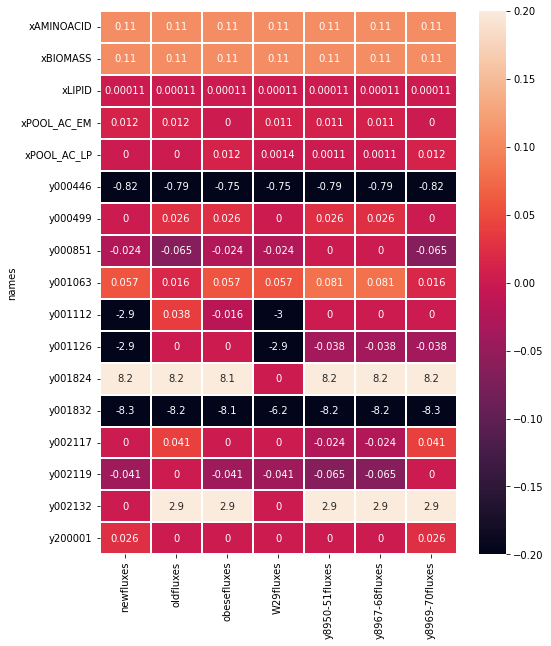

In [26]:
plt.figure(figsize=(8, 10))
sns.heatmap(fbanewtry2, vmin=-0.2, vmax=0.2, annot=True, linewidth=.1)